<img src="logo.png" style="width: 50%">

<font color='blue', size=5.5>Ipython Notebook para mostrar como ejecutar el protocolo de tratamiento de imágenes Landsat del Laboratorio de SIG y Teledetección de la Estación Biológica de Doñana </font>


#### Todo el protocolo está incluido dentro de una clase (Protocolo) , la cual incluye como métodos (funciones de la clase) los distintos pasos que se han seguido tradicionalmente (Importación, Reproyección, Corrección Radiometrica y Normalización).

#### Para ejecutar el protocolo se usan distintas librerías de python (fundamentalmente <font color='red'>GDAL</font> y <font color='red'>Rasterio</font>) y el software <font color='red'>Miramon</font> (importación y Corrección Radiométrica). Esté último software se llama mediante la generación y ejecución de archivos de texto en formato .bat

#### Lo primero que debemos hacer para poder ejecutar el protocolo es importarlo, para ello lo único que tenemos que hacer es llamar a la clase incluida en el archivo python. Esto lo hacemos del siguiente modo:


In [4]:
from Protocolo_V21 import Protocolo

#### Ahora ya tenemos disponible la clase y todos sus métodos. En principio para ejecutarla debemos instanciarla indicándole la ruta en la que está la imagen (o imágenes) a procesar. Un criterio a prori necesario es que se cree la estructura de carpetas /ori, /geo, /rad, /nor debiendo estar nuestra imagen a procesar en la carpeta ori. Si las carpetas no estuvieran creadas se pueden crear automáticamente, pero si es necesario que la imagen esté en una carpeta llamada ori

In [2]:
myProtocolo = Protocolo(r'C:\Users\Diego\Desktop\delete\ori\20140812l8oli202_34')

#### Con esta línea ya tenemos nuestro protocolo iniciado. Con esto ya tenemos diponibles todos los métodos a los que podemos llamar con nuestra clase. Los principales obviamente son Importación, Reproyección, Corrad y Normalización, pero estos se componen de varios métodos, a los que si quisieramos podríamos llamar de forma independiente. 
#### Para ver los métodos disponibles desde un Notebook tenemos que poner el nombre que le hayamos dado a la instancia (myProtocolo en este caso) seguido de un punto y darle al tabulador. Junto con los métodos disponibles también se crea al iniciar la clase una serie de información que es necesaria para ejecutar el protocolo (directorios, archivos, etc.) 

#### Otro aspecto importante que se crea al instanciar la clase es el registro de la escena en la Base de Datos (<font color='red'>MongoDB</font>). En concreto se almacena el id, la fecha en la que se instancia la clase y la cantidad de nubes que hay tanto en la escena (sacado del MTL.txt provisto con la escena) como sobre Doñana (Parque Nacional). Este valor lo sacamos nosotros cruzando la máscara de nubes con el shapefile del Parque Nacional

#### Es importante señalar que si se quisiera ejecutar el protocolo sobre todas las escenas en un directorio sería fácilmente ejecutable del siguiente modo (en principio esto estará implementado en la opción de visualización/ejecución que se decida):

In [ ]:
#Con estas 3 líneas se ejecutaría todo el protocolo a todas las escenas en un directorio

for i in os.listdir(path/to/folder/containig/severals/scenes):
    
    myProtocolo = os.path.join(path, i)
    myProtocolo.run_all()

#### Hecha esta indicación pasamos a ver como iríamos ejecutando el protocolo paso a paso. 

#### En primer lugar generaremos la máscara de nubes llamando a la herramienta Fmask

In [3]:
myProtocolo.fmask()

Mascara de nubes generada en -75.1649999619 segundos


#### En segundo lugar realizaremos la importción de la escena con  Miramon, para obtener el rel y los docs

In [4]:
myProtocolo.importacion()

['C:\\MiraMon\\TIFIMG', '9', 'C:\\Users\\Diego\\Desktop\\delete\\ori\\20140812l8oli202_34\\LC82020342014224LGN00_B1.TIF', 'C:\\Users\\Diego\\Desktop\\delete\\ori\\20140812l8oli202_34\\miramon_import', '1', '0', '/MD=C:\\Users\\Diego\\Desktop\\delete\\ori\\20140812l8oli202_34\\LC82020342014224LGN00_MTL.txt', '/DT=c:\\MiraMon']
Escena importada con exito en 98.7430000305 segundos


#### En el siguiente paso obtendremos el kl y generaremos un histograma con los X valores más bajos de cada banda. Estos histogramas se guardarán en rad, junto con un archivo 'escena'+kl.rad. Los valores del kl se guardarán también en la base de datos

modificados los metadatos del rad
obtenidos los kl y escrito el .rad en 22.6400001049 segundos


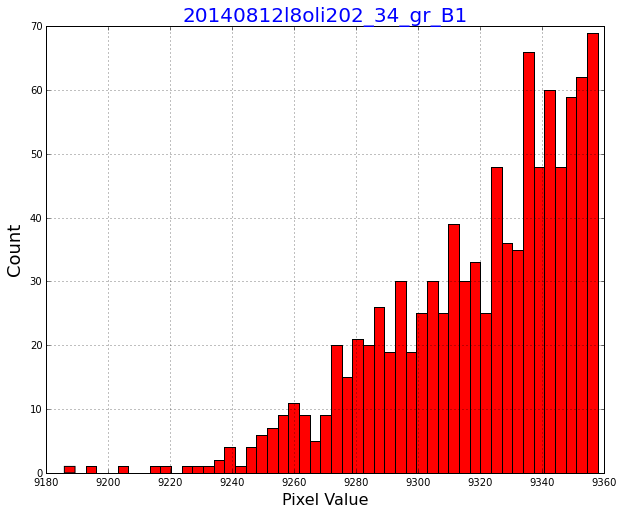

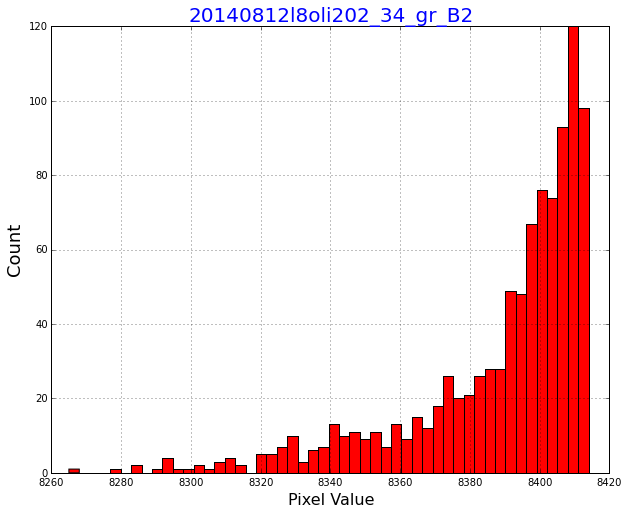

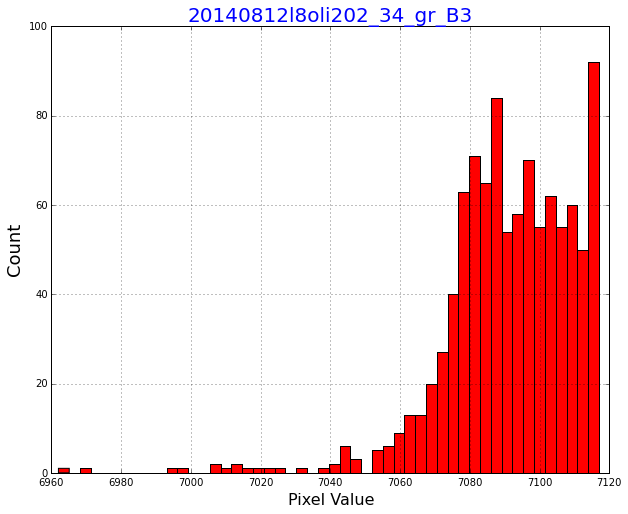

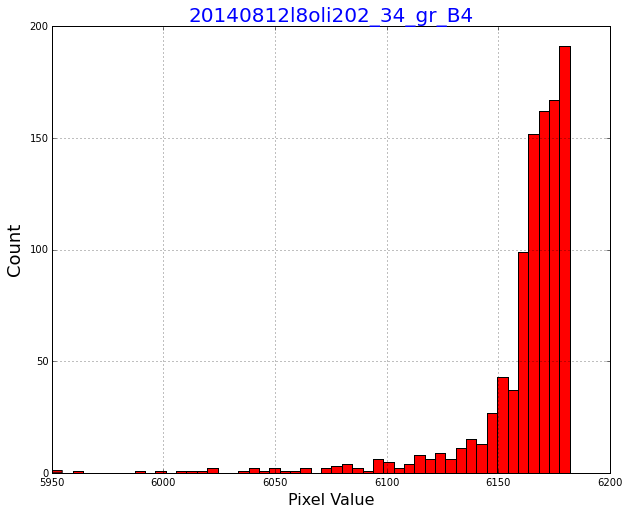

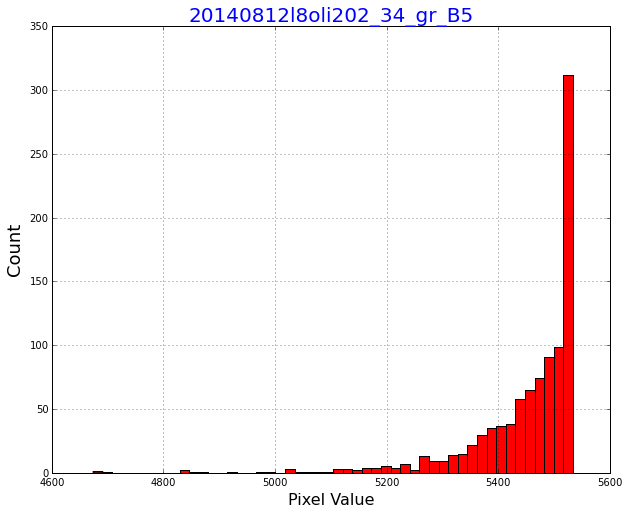

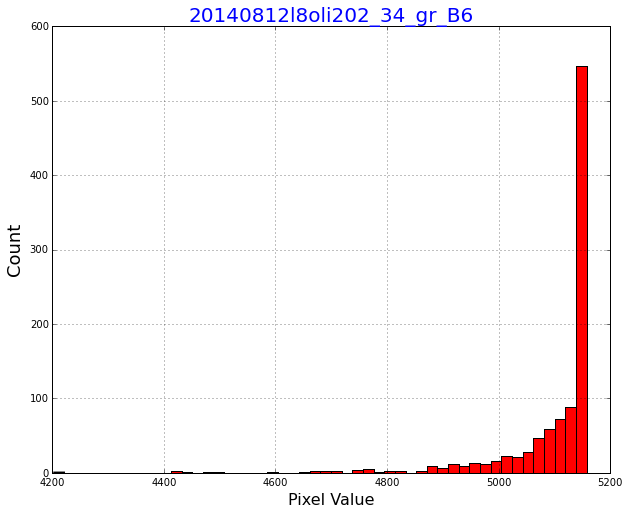

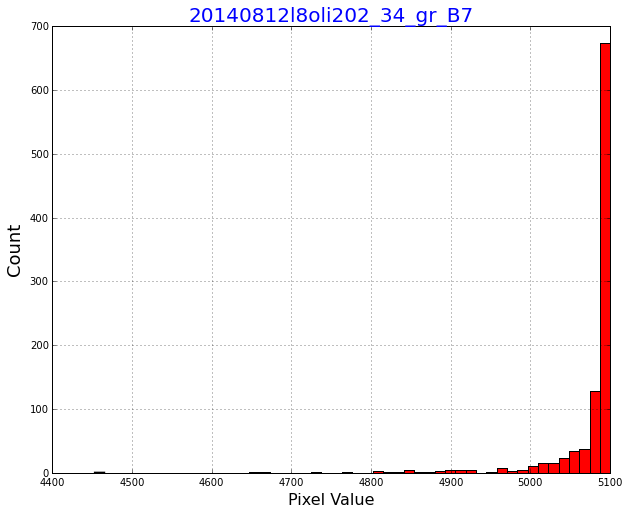

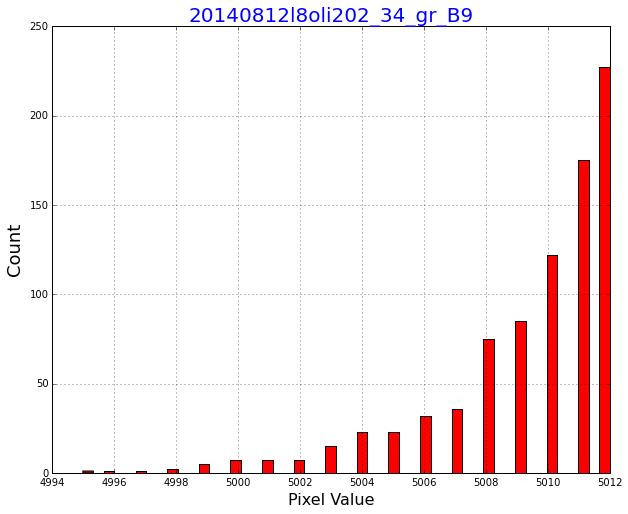

In [7]:
myProtocolo.kl()

#### Ya tenemos la máscara de nubes, la imagen importada y el kl e histograma de cada banda. A continuación pasamos a reproyectar todas las bandas de la escena

In [3]:
myProtocolo.reproyeccion()

Reproyectando LC82020342014224LGN00_B1.TIF
LC82020342014224LGN00_B1.TIF reproyectada en 53.7389998436 segundos
Reproyectando LC82020342014224LGN00_B10.TIF
LC82020342014224LGN00_B10.TIF reproyectada en 53.9949998856 segundos
Reproyectando LC82020342014224LGN00_B11.TIF
LC82020342014224LGN00_B11.TIF reproyectada en 53.1930000782 segundos
Reproyectando LC82020342014224LGN00_B2.TIF
LC82020342014224LGN00_B2.TIF reproyectada en 52.743999958 segundos
Reproyectando LC82020342014224LGN00_B3.TIF
LC82020342014224LGN00_B3.TIF reproyectada en 52.756000042 segundos
Reproyectando LC82020342014224LGN00_B4.TIF
LC82020342014224LGN00_B4.TIF reproyectada en 51.7409999371 segundos
Reproyectando LC82020342014224LGN00_B5.TIF
LC82020342014224LGN00_B5.TIF reproyectada en 52.1289999485 segundos
Reproyectando LC82020342014224LGN00_B6.TIF
LC82020342014224LGN00_B6.TIF reproyectada en 51.9500000477 segundos
Reproyectando LC82020342014224LGN00_B7.TIF
LC82020342014224LGN00_B7.TIF reproyectada en 50.6210000515 segundos

#### La reproyección es con diferencia el proceso que consume mayor cantidad de tiempo, tardando unos 12 minutos aproximadamente. Junto con la reproyección en sí, se han copiado (y modificado convenientemente los doc y rel de la importación)

#### A continuacion pasamos a realizar la Corrección Radiométrica. Este proceso aunque consume menos de la mitad del tiempo de la reproyeccion lleva asociados bastantes métodos, ya que tal y como se ha decidido, la salida del Corrad de MIramon (reales en porcentaje), se pasa a bytes previa corrección de aquellos pixeles con reflectividades por debajo y por encima de 0 y 100 respectivamente

In [4]:
myProtocolo.Corrad()

Archivos copiados y renombrados a Rad
['C:\\MiraMon\\CORRAD', '1', 'C:\\Users\\Diego\\Desktop\\delete\\rad\\20140812l8oli202_34\\20140812l8oli202_34_g_b1.img', 'C:\\Users\\Diego\\Desktop\\delete\\rad\\20140812l8oli202_34', 'C:\\Users\\Diego\\Desktop\\delete\\rad\\sindato.img', 'C:\\Users\\Diego\\Desktop\\delete\\rad\\kl.rad', '/MULTIBANDA /CONSERVAR_MDT /LIMIT_LAMBERT=73.000000 /REF_SUP_100 /REF_INF_0 /DT=c:\\MiraMon']
Llamando a Miramon... Miramon!!!!!!
Escena corregida con exito en 111.200999975 segundos
modificados los metadatos de  20140812l8oli202_34_gr_b1.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b2.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b3.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b4.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b5.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b6.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b7.hdr
modificados los metadatos de  20140812l8oli202_34_gr_b9.hdr
modifica

C:\Anaconda\lib\site-packages\rasterio\__init__.py:103: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


#### Finalmente solo nos quedaría la normalización, para ello se usa un método que va controlando en que nivel (std y máscara de PIAs usada) nos encontramos y que llama al siguiente nivel siempre que no se cumplan las condiciones de r > 0.85 y nº de pixeles para cada área >= 10. El método que realiza la normalización propiamente dicha recibe como parámetros la máscara a usar y el criterio de la std que debe de aplicar. Cuando los valores se cumplan se guardan en un diccionario del tipo {'b1':  {'parametros': {'slope': value, 'intercept': value, 'N': value}, areas:{'arena': value, urbano':value...}}} que se guardará en la base de datos y como archivo de texto en la carpeta nor.

#### Finalmente la máscara de nubes se guardará también como raster binario de 0 y 1 por imposición de David Aragones ;)

In [3]:
myProtocolo.normalizacion()

landsat 8

C:\Users\Diego\Desktop\delete\rad\20140812l8oli202_34\20140812l8oli202_34_gr_b2.img  desde normalize
comenzando nor1
C:\Users\Diego\Desktop\delete\nor\20140812l8oli202_34\20140812l8oli202_34_CM.img
mascara:  C:\Users\Diego\Desktop\Landsat_8\MASK_1.img
b2

++++++++++++++++++++++++++++++++++
slope: 1.89634391348 intercept: 10.4025564279 r 0.979764226155 N: 53152
++++++++++++++++++++++++++++++++++

{'Arena': 669, 'Embalses': 1581, 'Mineria': 87, 'Mar': 47721, 'Urbano-1': 476, 'Urbano-2': 735, 'Aeropuertos': 212, 'Pastizales': 82, 'Pinar': 1589} b2
parametros en nor1:  {'b2': {'Parametros': {'slope': 1.8963439134807982, 'r': 0.97976422615490433, 'intercept': 10.402556427860034, 'N': 53152}, 'Tipo_Area': {'Arena': 669, 'Embalses': 1581, 'Mineria': 87, 'Mar': 47721, 'Urbano-1': 476, 'Urbano-2': 735, 'Aeropuertos': 212, 'Pastizales': 82, 'Pinar': 1589}}}
\comenzando nor2


Normalizacion de  b2  realizada.

C:\Users\Diego\Desktop\delete\rad\20140812l8oli202_34\20140812l8oli202_34_gr

C:\Anaconda\lib\site-packages\rasterio\__init__.py:103: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


NameError: global name 'fmask_binary' is not defined

In [5]:
myProtocolo.fmask_binary()